<a href="https://colab.research.google.com/github/Epalaciol/VisionArtificial_2021_Retinas/blob/master/TrabajoRetinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visión Artificial

# Imágenes digitales de retinas para extracción de vasos sanguíneos

Integrantes: 
- Alejandra Betancur Palacio
- Juan Camilo  Molina Roncancio
- Esteban Palacio Londoño
- Valentina Tamayo Guarin 
- Mateo Valencia Diaz
- Angie Tatiana Solano Rodriguez


## Introducción

[Inserte aqui la intro]


## Preprocesamiento de imagenes

In [108]:
!pip install opencv-contrib-python

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage import io, color

In [36]:
#Construimos una funcion que nos facilita la lectura de las imagenes

def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    elif(mode=='yuv' or mode=='YUV'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2YUV)
    elif(mode=='hsv' or mode=='HSV'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2HSV)
    elif(mode=='lab' or mode=='LAB'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2LAB)
    else:
        return None

# Espacios de color:
Procederemos a analizar algunos de los espacios de color separados por canales para filtrar los mejores candidatos para nuestro objetivo.

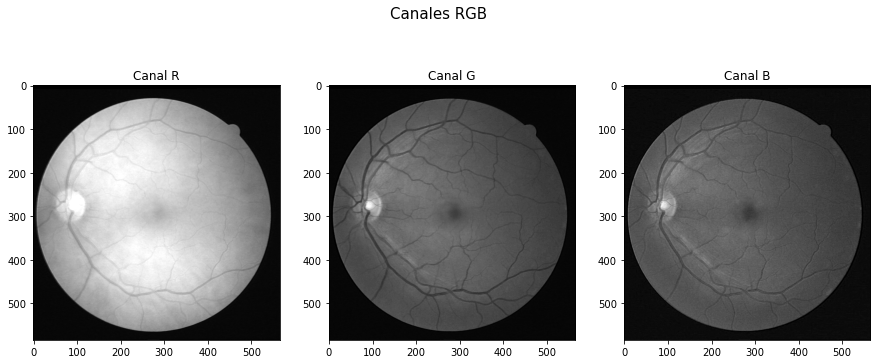

In [44]:
img_rgb = img_read('images/training/images/35_training.tif')

#Modelo RGB
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales RGB', fontsize=15)
ax1.set_title('Canal R')
ax1.imshow(img_R, cmap='gray')
ax2.set_title('Canal G')
ax2.imshow(img_G, cmap='gray')
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap='gray')


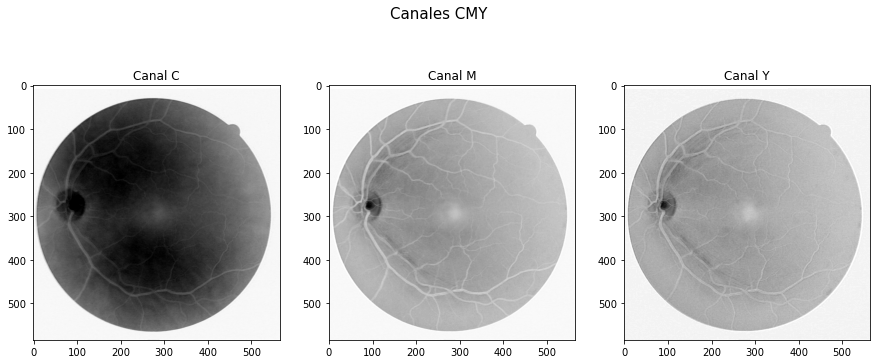

In [21]:
img_cmy = img_read('images/training/images/35_training.tif')

#Modelo CMY
img_C= 255 - img_cmy[:,:,0]
img_M = 255 - img_cmy[:,:,1]
img_Y = 255 - img_cmy[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales CMY', fontsize=15)
ax1.set_title('Canal C')
ax1.imshow(img_C, cmap='gray')
ax2.set_title('Canal M')
ax2.imshow(img_M, cmap='gray')
ax3.set_title('Canal Y')
ax3.imshow(img_Y, cmap='gray')

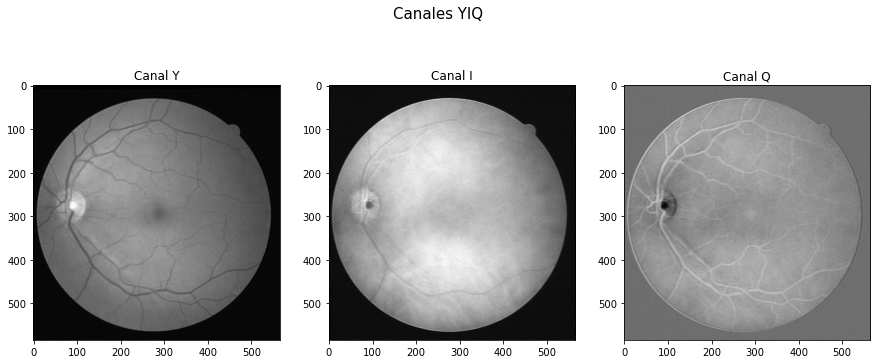

In [12]:
img_yiq = img_read('images/training/images/35_training.tif')

#Modelo YIQ
img_R = img_yiq[:,:,0]
img_G = img_yiq[:,:,1]
img_B = img_yiq[:,:,2]

img_Y = 0.299*img_R + 0.587*img_G + 0.114*img_B
img_I = 0.596*img_R - 0.274*img_G - 0.322*img_B
img_Q = 0.211*img_R - 0.523*img_G + 0.312*img_B

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales YIQ', fontsize=15)
ax1.set_title('Canal Y')
ax1.imshow(img_Y, cmap='gray')
ax2.set_title('Canal I')
ax2.imshow(img_I, cmap='gray')
ax3.set_title('Canal Q')
ax3.imshow(img_Q, cmap='gray')

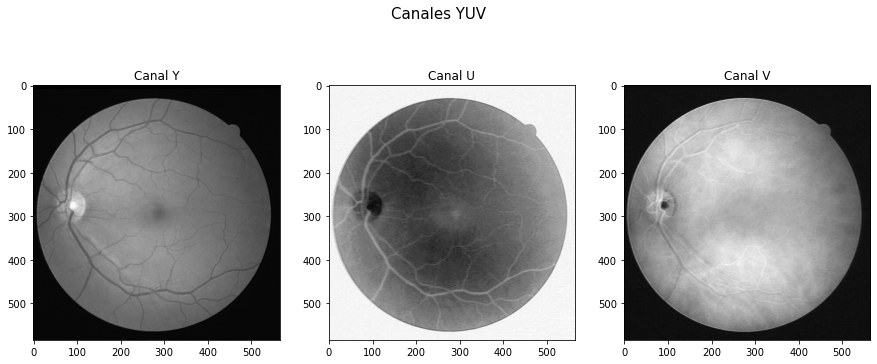

In [20]:
img_yuv = img_read('images/training/images/35_training.tif',mode="yuv")

#Modelo YUV

img_Y = img_yuv[:,:,0]
img_U =  img_yuv[:,:,1]
img_V = img_yuv[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales YUV', fontsize=15)
ax1.set_title('Canal Y')
ax1.imshow(img_Y, cmap='gray')
ax2.set_title('Canal U')
ax2.imshow(img_U, cmap='gray')
ax3.set_title('Canal V')
ax3.imshow(img_V, cmap='gray')

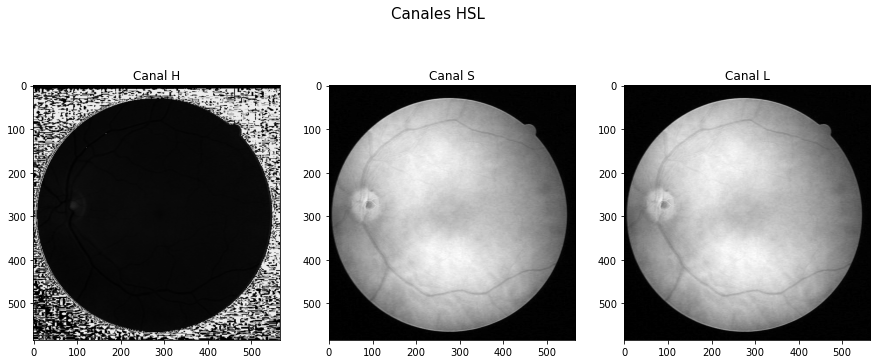

In [27]:
img_HSL = img_read('images/training/images/35_training.tif')

#Modelo HSL

img_rgb = img_HSL.astype(np.float32)/255
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

tam = np.shape(img_rgb)
img_hsl =np.zeros((tam), dtype=np.float32)

for i in range(tam[0]):
    for j in range(tam[1]):
        max_val = np.max(img_rgb[i][j])
        min_val = np.min(img_rgb[i][j])
        s = max_val - min_val
        l = s/2
        img_hsl[i][j][1] = s
        img_hsl[i][j][2] = l
        if(max_val==min_val):
            img_hsl[i][j][0] = 0
            continue
        red = img_rgb[i][j][0]
        green = img_rgb[i][j][1]
        blue = img_rgb[i][j][2]
        if(max_val == red):
            h = (green-blue)*60/(max_val-min_val)
        elif(max_val == green):
            h = (blue-red)*60/(max_val-min_val) + 120
        else:
            h = (red-green)*60/(max_val-min_val) + 240
        if h >= 0:
            img_hsl[i,j,0]=h
        else:
            img_hsl[i,j,0] = 360.0 - h

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales HSL', fontsize=15)
ax1.set_title('Canal H')
ax1.imshow(img_hsl[:,:,0], cmap='gray')
ax2.set_title('Canal S')
ax2.imshow(img_hsl[:,:,1], cmap='gray')
ax3.set_title('Canal L')
ax3.imshow(img_hsl[:,:,2], cmap='gray')


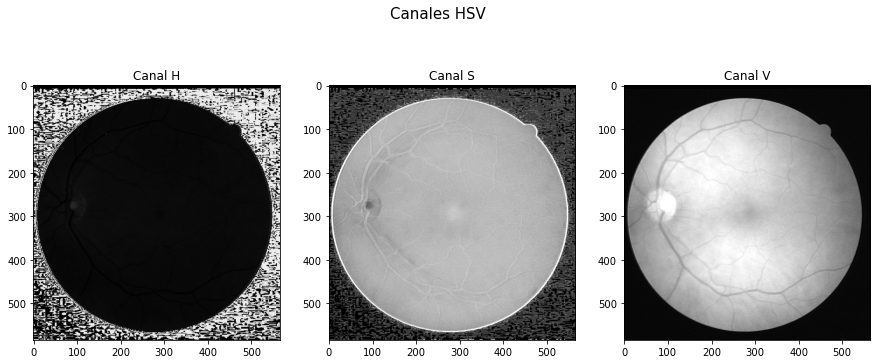

In [33]:
img_hsv = img_read('images/training/images/35_training.tif',mode="hsv")

#Modelo HSV

img_H = img_hsv[:,:,0]
img_S =  img_hsv[:,:,1]
img_V = img_hsv[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales HSV', fontsize=15)
ax1.set_title('Canal H')
ax1.imshow(img_H, cmap='gray')
ax2.set_title('Canal S')
ax2.imshow(img_S, cmap='gray')
ax3.set_title('Canal V')
ax3.imshow(img_V, cmap='gray')

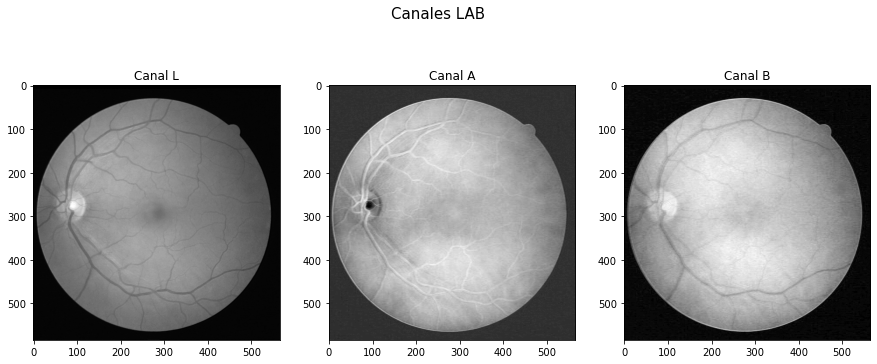

In [62]:
img_lab = img_read('images/training/images/35_training.tif',mode="lab")

#Modelo LAB

img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_B = img_lab[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))
fig.suptitle('Canales LAB', fontsize=15)
ax1.set_title('Canal L')
ax1.imshow(img_L, cmap='gray')
ax2.set_title('Canal A')
ax2.imshow(img_A, cmap='gray')
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap='gray')

Luego de analizar los respectivos canales para el preprocesamiento de la imagen, se consideraron como los más aptos el canal (G), perteneciente al modelo de color RGB, el canal (Y) perteneciente al modelo de color YUV y el canal (M) perteneciente al modelo de color CMY. Estos canales resultaron ser más favorables puesto que hay mayor contraste en las partes de interés, lo cual nos permite observar diferencia significativa de los vasos sanguíneos de la retina del ojo. Descartamos totalmente los modelos de color HSL y HSV ya que difuminan demasiado la parte de interés y tambien descartamos el modelo de color LAB ya que obtenemos resultados muy similares a los modelos de color ya seleccionados. Evidenciamos la necesidad de realizar un preprocesamiento para mejorar la detección de los mismos, ya que las imágenes tienen una iluminación no uniforme, poco contraste y ruido. Con la finalidad de contrarestar las condiciones, para así mejorar la calidad de la imagen para el fin que buscamos.

# Comparativa entre canales:
Procederemos a hacer una comparacion entre estos tres canales seleccionados con cinco distintas imagenes del dataset que creemos tienen unas caracteristicas distintivas, como una mayor iluminacion o un color de la retina un tanto distinto. Para asi hallar el canal mas apropiado para todo tipo de situación.

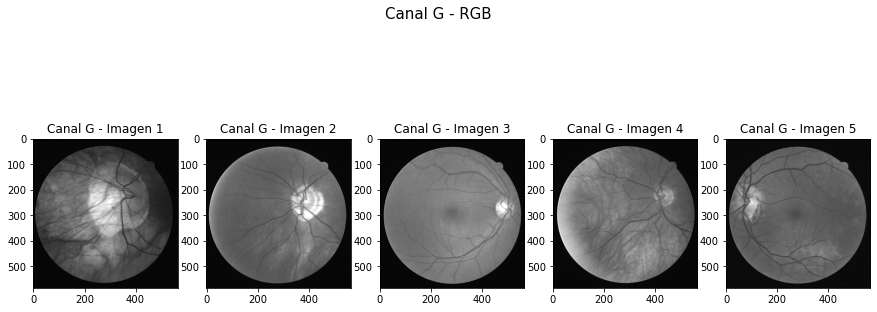

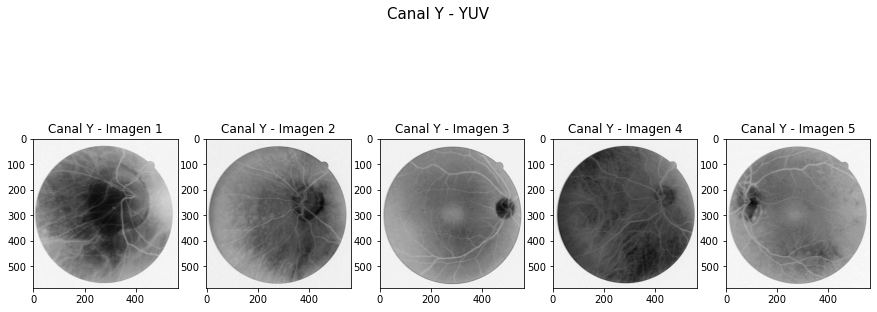

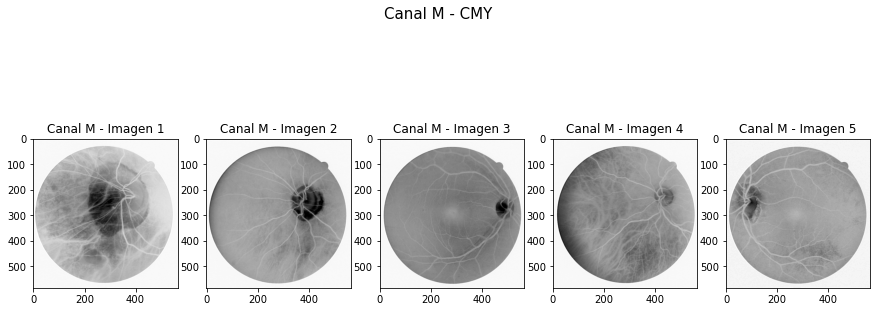

In [65]:
#Leamos estas imagenes representativas para compararlas

imagen1 = img_read('images/training/images/34_training.tif')
imagen2 = img_read('images/training/images/31_training.tif')
imagen3 = img_read('images/training/images/38_training.tif')
imagen4 = img_read('images/training/images/23_training.tif')
imagen5 = img_read('images/training/images/26_training.tif')

imagen1yuv = img_read('images/training/images/34_training.tif',mode="yuv")
imagen2yuv = img_read('images/training/images/31_training.tif',mode="yuv")
imagen3yuv = img_read('images/training/images/38_training.tif',mode="yuv")
imagen4yuv = img_read('images/training/images/23_training.tif',mode="yuv")
imagen5yuv = img_read('images/training/images/26_training.tif',mode="yuv")

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(15, 6))
fig.suptitle('Canal G - RGB', fontsize=15)
ax1.set_title('Canal G - Imagen 1')
ax1.imshow(imagen1[:,:,1], cmap='gray')
ax2.set_title('Canal G - Imagen 2')
ax2.imshow(imagen2[:,:,1], cmap='gray')
ax3.set_title('Canal G - Imagen 3')
ax3.imshow(imagen3[:,:,1], cmap='gray')
ax4.set_title('Canal G - Imagen 4')
ax4.imshow(imagen4[:,:,1], cmap='gray')
ax5.set_title('Canal G - Imagen 5')
ax5.imshow(imagen5[:,:,1], cmap='gray')

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(15, 6))
fig.suptitle('Canal Y - YUV', fontsize=15)
ax1.set_title('Canal Y - Imagen 1')
ax1.imshow(imagen1yuv[:,:,1], cmap='gray')
ax2.set_title('Canal Y - Imagen 2')
ax2.imshow(imagen2yuv[:,:,1], cmap='gray')
ax3.set_title('Canal Y - Imagen 3')
ax3.imshow(imagen3yuv[:,:,1], cmap='gray')
ax4.set_title('Canal Y - Imagen 4')
ax4.imshow(imagen4yuv[:,:,1], cmap='gray')
ax5.set_title('Canal Y - Imagen 5')
ax5.imshow(imagen5yuv[:,:,1], cmap='gray')

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(15, 6))
fig.suptitle('Canal M - CMY', fontsize=15)
ax1.set_title('Canal M - Imagen 1')
ax1.imshow(255 - imagen1[:,:,1], cmap='gray')
ax2.set_title('Canal M - Imagen 2')
ax2.imshow(255 - imagen2[:,:,1], cmap='gray')
ax3.set_title('Canal M - Imagen 3')
ax3.imshow(255 - imagen3[:,:,1], cmap='gray')
ax4.set_title('Canal M - Imagen 4')
ax4.imshow(255 - imagen4[:,:,1], cmap='gray')
ax5.set_title('Canal M - Imagen 5')
ax5.imshow(255 - imagen5[:,:,1], cmap='gray')


Aqui debe ir la conclusión con respecto a la seleccion del canal, o como idea podemos descartar uno aqui y seguir trabajando de
aqui hacia abajo con dos de los tres canales, graficando todo en esos dos canales y mirar los mejores resultados.

# Filtros:
Se implemento la corrección o transformación Gamma, la cual se usa para manipular el contraste y realzar la imagen. Para este caso con el fin de aumentar el brillo, lo cual nos permitió resaltar la visualización de los vasos.

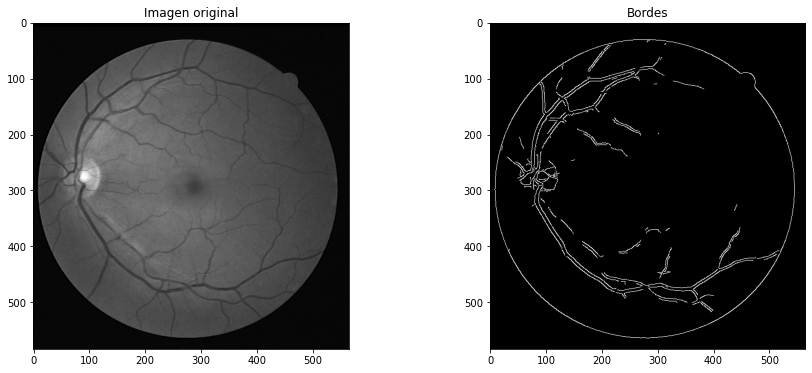

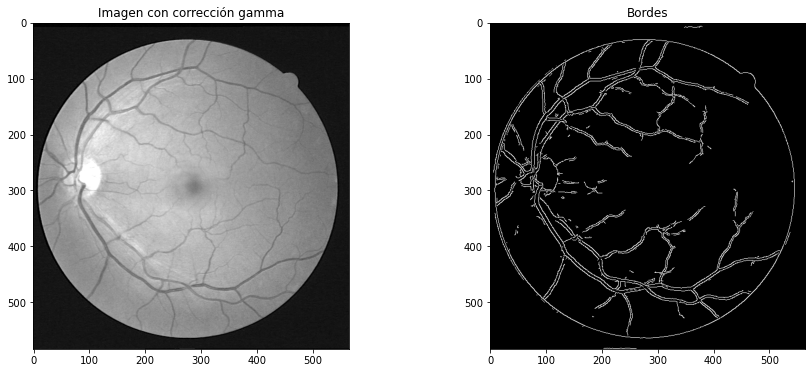

In [70]:
#Definimos esta función para detectar bordes, la usaremos mas adelante
def detect_edge(image, umbral_min, umbral_max, titulo = "Imagen original"): 
    image_with_edges = cv2.Canny(image , umbral_min, umbral_max)
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
    ax1.set_title(titulo)
    ax1.imshow(image, cmap='gray')
    ax2.set_title('Bordes')
    ax2.imshow(image_with_edges, cmap='gray')

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
        
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy, gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada


#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1.5
gamma = 0.8

res_oscuro = gamma_correction(img_G, a, gamma)

#Usamos nuestra función para observar la diferencia en detección de bordes de la imagen antes y despues de la corrección
detect_edge(img_G, 80, 140)
detect_edge(res_oscuro, 80, 140, "Imagen con corrección gamma")

Usamos ecualización, que es una de las técnicas más utilizadas para la mejora del contraste de la imagen. Para nuestro caso las imágenes presentan desigualdad de iluminación, lo que lleva a que los vasos sanguineos no se segmenten de manera adecuada. Para mitigar este problema se propone una ecualización del histograma, que nos permite observar un realce de los mismos.


<Figure size 432x288 with 0 Axes>

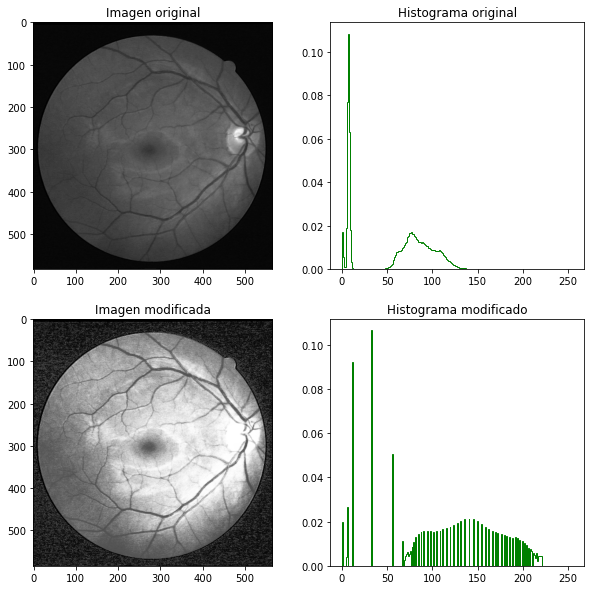

In [72]:
#Definir la función ecualización del histograma cuyo parámetro es una imagen
img_rgb1 = img_read('images/training/images/29_training.tif')
#Modelo RGB
img_G2 = img_rgb1[:,:,1]

def histogram_equalization(img):
         
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen es decir \aplanarla\
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), density=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = (gmax - gmin)*cdf[g] + gmin
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta

res_ecua= histogram_equalization(img_G2)

#Generar subplot 2x3 para mostrar imagen histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,2 ,figsize=(10 ,10))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img_G2, cmap='gray')
arreglo_plots[0,1].set_title('Histograma original')
img_array_i = img_G.ravel()
_=arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255 ,
                            range=(0.0, 255.0),density=True ,color=colors[1])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res_ecua, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
img_array_i = res_ecua.ravel()
_=arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255,
                          range=(0.0, 255.0),density=True, color=colors[1])


Con la ecualización obtenemos un buen resultado, pero genera mucho ruido al aplicar el Filtro gaussiano, se observa la mejora que obtenemos en la detección bordes.

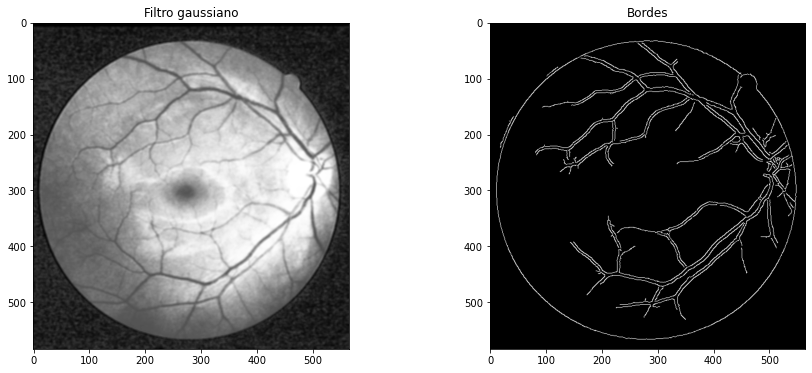

In [75]:
res_gauss= cv2.GaussianBlur(res_ecua,(5, 5),2)
detect_edge(res_gauss, 60, 140, "Filtro gaussiano")